In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset

from sklearn.preprocessing import LabelEncoder
import numpy as np
# from tqdm import tqdm
# import time
# import copy

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

# importing the statistics module
import statistics

import joblib


In [2]:
# # read fold for check
# f1 = pd.read_csv("../5-fold_new/fold1.csv")
# f2 = pd.read_csv("../5-fold_new/fold2.csv")
# f3 = pd.read_csv("../5-fold_new/fold3.csv")
# f4 = pd.read_csv("../5-fold_new/fold4.csv")
# f5 = pd.read_csv("../5-fold_new/fold5.csv")

# # read raw data
# raw_data = pd.read_csv("../raw_data/data.csv")

# review

In [3]:
# # run it once
# raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
# raw_data

In [4]:
# print("########## the fold ############")
# print("fold1: "+ str(len(f1)))
# print("fold2: "+ str(len(f2)))
# print("fold3: "+ str(len(f3)))
# print("fold4: "+ str(len(f4)))
# print("fold5: "+ str(len(f5)))
# print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
# print("################################")

In [5]:
# y_f1 = f1[f1.columns[1]]
# le = LabelEncoder()
# y_f1 = np.array(le.fit_transform(y_f1))
# print(le.classes_)
# y_f2 = f2[f2.columns[1]]
# le = LabelEncoder()
# y_f2 = np.array(le.fit_transform(y_f2))
# print(le.classes_)
# y_f3 = f3[f3.columns[1]]
# le = LabelEncoder()
# y_f3 = np.array(le.fit_transform(y_f3))
# print(le.classes_)
# y_f4 = f4[f4.columns[1]]
# le = LabelEncoder()
# y_f4 = np.array(le.fit_transform(y_f4))
# print(le.classes_)
# y_f5 = f5[f5.columns[1]]
# le = LabelEncoder()
# y_f5 = np.array(le.fit_transform(y_f5))
# print(le.classes_)

In [6]:
# # check balance in each fold
# print("------ fold ------")
# print("f1 positive: " + str(sum(y_f1)))
# print("f1 negative: " + str(len(f1) - sum(y_f1)))
# print("------------------")
# print("f2 positive: " + str(sum(y_f2)))
# print("f2 negative: " + str(len(f2) - sum(y_f2)))
# print("------------------")
# print("f3 positive: " + str(sum(y_f3)))
# print("f3 negative: " + str(len(f3) - sum(y_f3)))
# print("------------------")
# print("f4 positive: " + str(sum(y_f4)))
# print("f4 negative: " + str(len(f4) - sum(y_f4)))
# print("------------------")
# print("f5 positive: " + str(sum(y_f5)))
# print("f5 negative: " + str(len(f5) - sum(y_f5)))
# print("------------------")

# setting

In [22]:
# setting split and path
# split = 'split1'
# path = "../5-fold_new/DATA/"
# train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
# # test_path =  "{}/{}/test/test_{}.csv".format(path,split,split)
# test_path =  "{}/test.csv".format(path)
# valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)
split = 'split1'
path = "../Anny_oversampling/DATA"
train_path = "{}/{}/train/oversampled_train_{}.csv".format(path,split,split)
test_path =  "{}/test.csv".format(path)
val_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [23]:
# # check if path is correct
# print(train_path)
# print(test_path)
# print(valid_path)

In [24]:
# Load the train set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(518, 32)
(518, 30)
['B' 'M']


In [25]:
# Load the test set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [26]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [27]:
# # Load the raw set
# x_raw = raw_data[raw_data.columns[2:]]
# y_raw = raw_data[raw_data.columns[1]]
# le = LabelEncoder()
# y_raw = np.array(le.fit_transform(y_raw))
# print(le.classes_)

In [28]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split1
train positive:    259
validate positive: 39


In [29]:
sc = StandardScaler()
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_val = sc.fit_transform(x_val)

In [30]:
# # Define a custom dataset class
# class WisconsinDataset(Dataset):
#     def __init__(self, x, y):
#         self.X = x.values
#         self.y = y
#         self.X = torch.tensor(self.X, dtype=torch.float32)
#         self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
#     def __len__(self):
#         return len(self.X)
    
#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]

In [31]:
# batch = 1
# # Initialize the datasets and data loaders
# val_dataset = WisconsinDataset(x_val, y_val)
# train_dataset = WisconsinDataset(x_train, y_train)
# test_dataset = WisconsinDataset(x_test, y_test)
# train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=1)
# val_loader = DataLoader(val_dataset, batch_size=batch)

In [32]:
# dataloaders = {
#     'train': train_loader
#     , 'valid': val_loader}

In [33]:
# print("######### Check balance! ##########")
# print(split)
# # train
# count_train = 0
# for image,label in train_dataset:
#     count_train = count_train + label
# print("Train have abnormal: {}".format(count_train))
# print("Train have normal: {}".format(len(train_dataset) - count_train))
# print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# # val
# count_val = 0
# for image,label in val_dataset:
#     count_val = count_val + label
# print("Validate have abnormal: {}".format(count_val))
# print("Validate have normal: {}".format(len(val_dataset) - count_val))
# print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# # test
# count_test = 0
# for image,label in test_dataset:
#     count_test = count_test + label
# print("Test have abnormal: {}".format(count_test))
# print("Test have normal: {}".format(len(test_dataset) - count_test))
# print("####################################")

# step train

In [34]:
# # Define parameter grid
# param_grid = {'C': [3.87, 3.875, 3.88, 3.85],
#               'gamma': [0.04, 0.05, 0.06, 0.07],
#               'kernel': ['linear', 'rbf', 'sigmoid']}

# # Define SVM model
# svm_model = SVC()

# # Define grid search object
# grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# # Fit grid search object to the data
# grid_search.fit(x_raw, y_raw)

# # Print best parameter and score
# print('Best C parameter:', grid_search.best_params_['C'])
# print('Best gamma parameter:', grid_search.best_params_['gamma'])
# print('Best kernel parameter:', grid_search.best_params_['kernel'])
# print('Best score:', grid_search.best_score_)

In [35]:
# Define model
svm = SVC(C=10, gamma=0.01, kernel='sigmoid')
lr = LogisticRegression(C=0.08685113737513521, max_iter=1000, penalty='l2', solver='lbfgs')
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter="random")
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='invscaling', eta0=0.1, max_iter=2000, alpha=0.01)
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 4, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)


In [36]:
svm.fit(x_train, y_train)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
sgd.fit(x_train, y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [37]:
# create the voting ensemble model
ensemble = VotingClassifier(estimators=[('svm', svm), ('lr', lr), ('dt', dt), ('sgd', sgd), ('rf', rf)], voting='hard')

In [38]:
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('svm', SVC(C=10, gamma=0.01, kernel='sigmoid')),
                             ('lr',
                              LogisticRegression(C=0.08685113737513521,
                                                 max_iter=1000)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_leaf=3,
                                                     min_samples_split=7,
                                                     splitter='random')),
                             ('sgd',
                              SGDClassifier(alpha=0.01, eta0=0.1,
                                            learning_rate='invscaling',
                                            max_iter=2000,
                                            penalty='elasticnet')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
            

In [39]:
# joblib.dump(svm, 'svm_model.joblib')
# joblib.dump(sgd, 'sgd_model.joblib')
# joblib.dump(dt, 'dt_model.joblib')
# joblib.dump(lr, 'lr_model.joblib')

# save the model
joblib.dump(ensemble, 'ensemble_model_4-22-2023.joblib')

['ensemble_model_4-22-2023.joblib']

# step eval

In [40]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [41]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [42]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [43]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [44]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [45]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

# SVM

split2
############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 7 31]] 

----------------
Sensitivity: 81.58%
Specificity: 100.00%
Accuracy: 92.31%
Precision: 100.00%
Sensitivity: 81.58%
Precision: 100.00%
F1: 89.86%


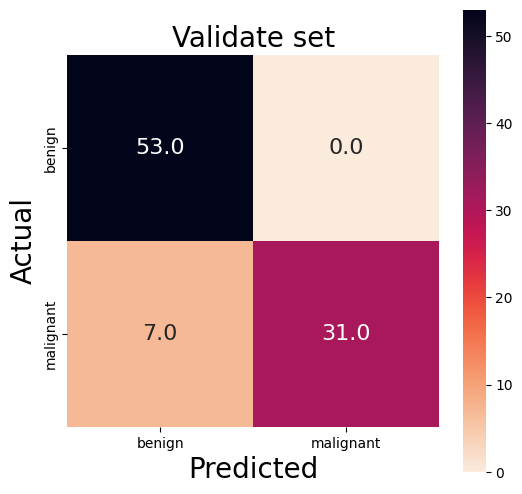

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [16 52]] 

----------------
Sensitivity: 76.47%
Specificity: 100.00%
Accuracy: 85.96%
Precision: 100.00%
Sensitivity: 76.47%
Precision: 100.00%
F1: 86.67%


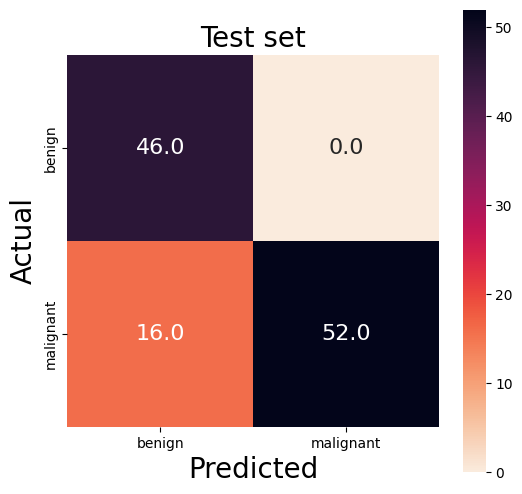

---------------------------------------
AUC validate: 0.9079
AUC test: 0.8824


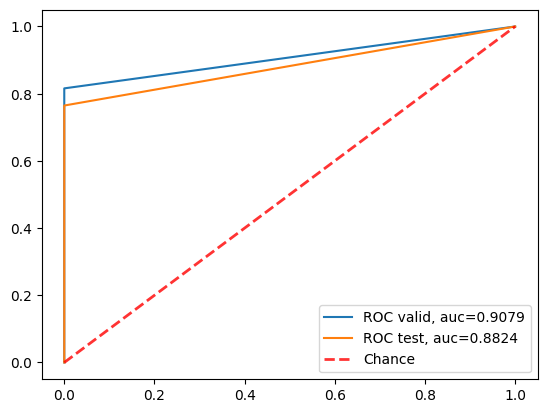

In [31]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = svm.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = svm.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# SGD

split2
############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 6 32]] 

----------------
Sensitivity: 84.21%
Specificity: 100.00%
Accuracy: 93.41%
Precision: 100.00%
Sensitivity: 84.21%
Precision: 100.00%
F1: 91.43%


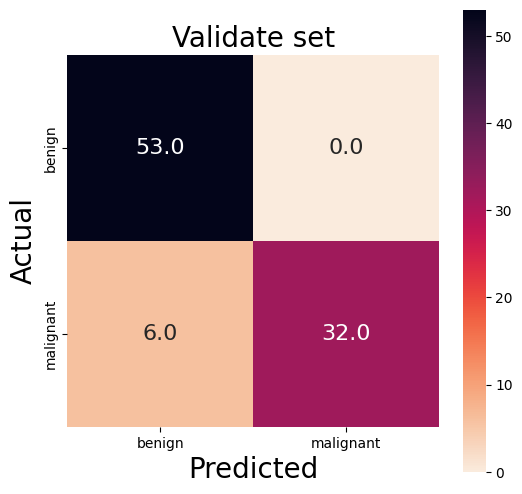

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [17 51]] 

----------------
Sensitivity: 75.00%
Specificity: 100.00%
Accuracy: 85.09%
Precision: 100.00%
Sensitivity: 75.00%
Precision: 100.00%
F1: 85.71%


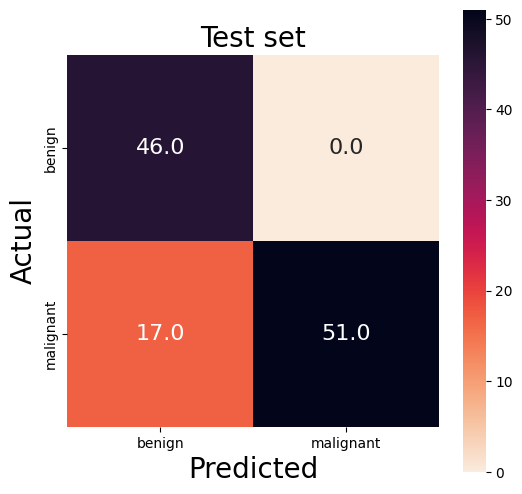

---------------------------------------
AUC validate: 0.9211
AUC test: 0.8750


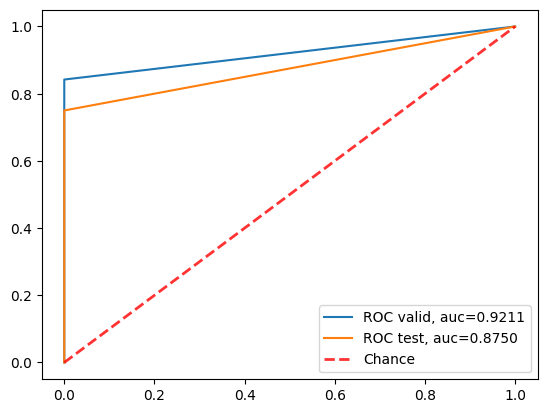

In [32]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = sgd.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# Decision Tree

split2
############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 9 29]] 

----------------
Sensitivity: 76.32%
Specificity: 100.00%
Accuracy: 90.11%
Precision: 100.00%
Sensitivity: 76.32%
Precision: 100.00%
F1: 86.57%


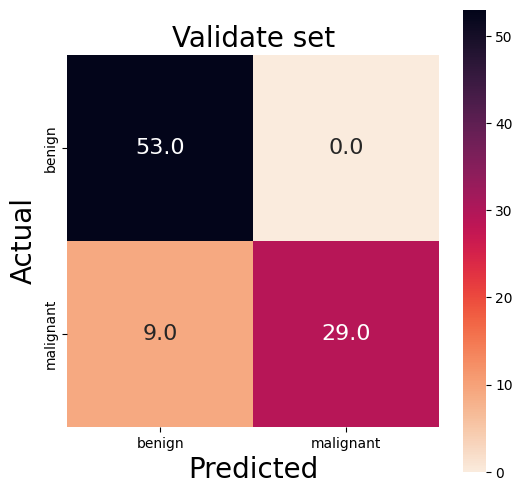

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [29 39]] 

----------------
Sensitivity: 57.35%
Specificity: 100.00%
Accuracy: 74.56%
Precision: 100.00%
Sensitivity: 57.35%
Precision: 100.00%
F1: 72.90%


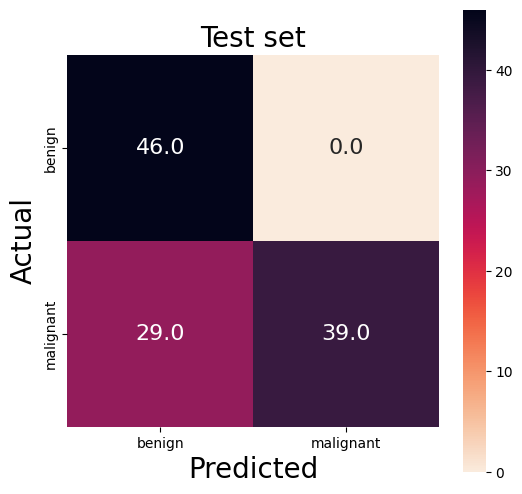

---------------------------------------
AUC validate: 0.8816
AUC test: 0.7868


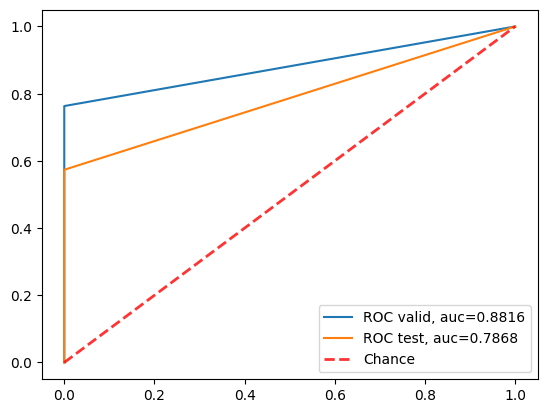

In [33]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = dt.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = dt.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# Logistic regression

split2
############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 7 31]] 

----------------
Sensitivity: 81.58%
Specificity: 100.00%
Accuracy: 92.31%
Precision: 100.00%
Sensitivity: 81.58%
Precision: 100.00%
F1: 89.86%


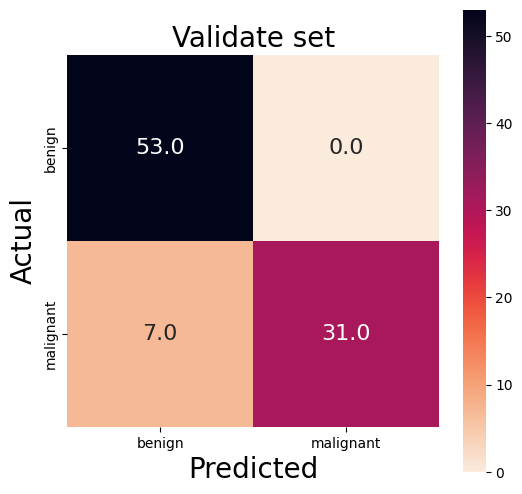

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [21 47]] 

----------------
Sensitivity: 69.12%
Specificity: 100.00%
Accuracy: 81.58%
Precision: 100.00%
Sensitivity: 69.12%
Precision: 100.00%
F1: 81.74%


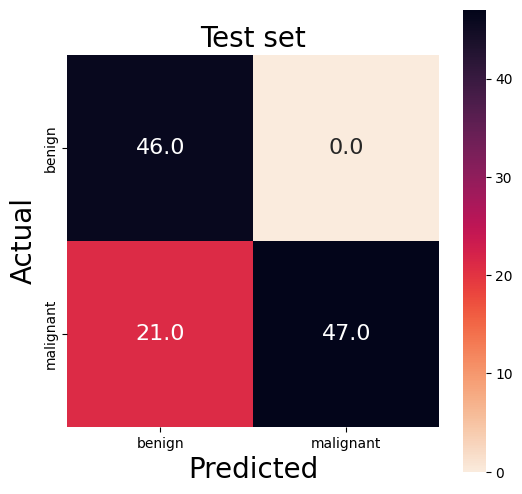

---------------------------------------
AUC validate: 0.9079
AUC test: 0.8456


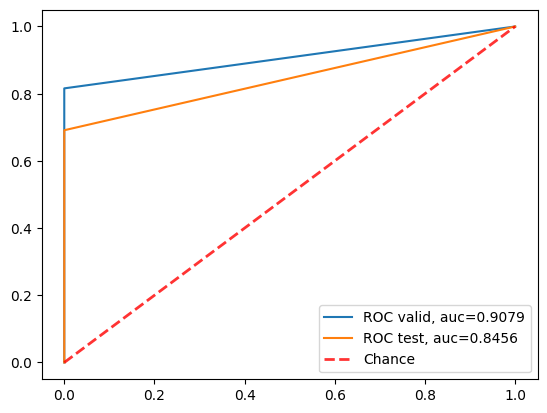

In [34]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = lr.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = lr.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# Ensemble

split1
############## validate set ################
Confusion Matrix
----------------
[[47  5]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 90.38%
Accuracy: 93.41%
Precision: 88.37%
Sensitivity: 97.44%
Precision: 88.37%
F1: 92.68%


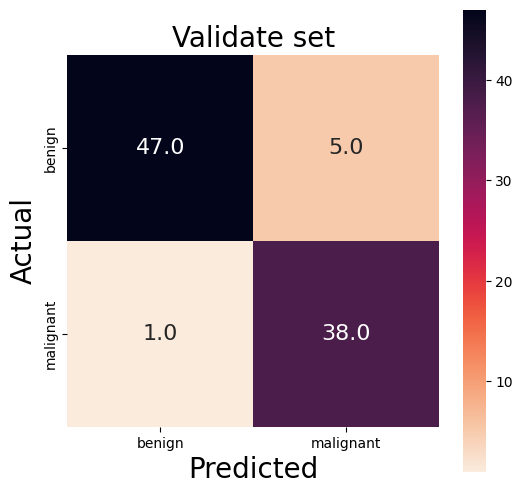

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 100.00%
Accuracy: 97.37%
Precision: 100.00%
Sensitivity: 95.59%
Precision: 100.00%
F1: 97.74%


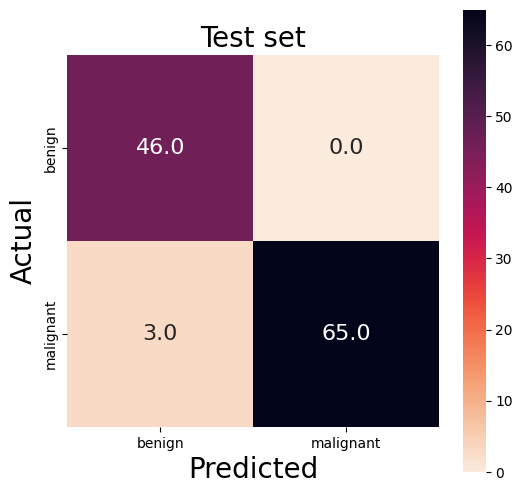

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9779


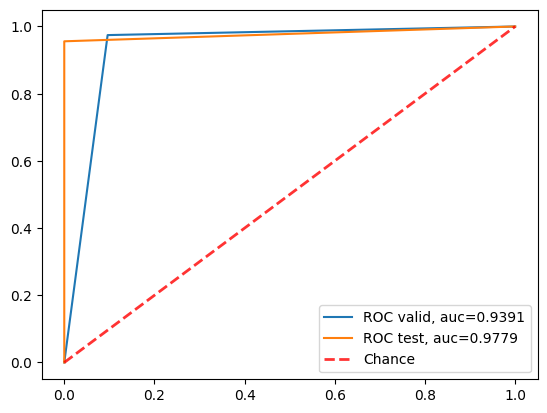

In [46]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = ensemble.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = ensemble.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# compare

In [32]:

test_split1 = np.array([[12, 1], [12, 12]])
test_split2 = np.array([[13, 0], [13, 1]])
test_split3 = np.array([[10, 4], [5, 9]])
test_split4 = np.array([[13, 0], [11, 8]])
test_split5 = np.array([[6, 10], [3, 21]])

In [33]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5

In [34]:
# print(overall_test)

Text(0.5, 81.72222222222219, 'Predicted')

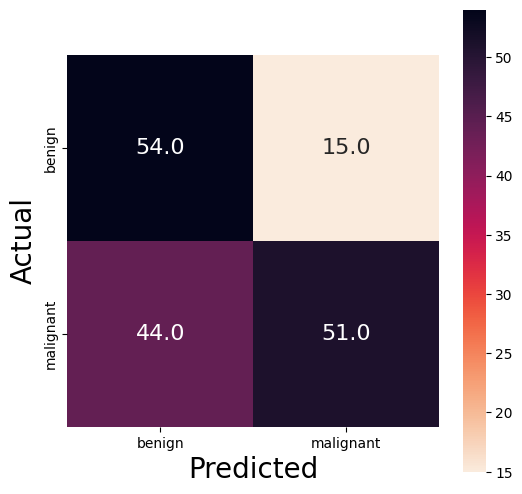

In [35]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [36]:
sen_split1 = sensitivity(cm_test_split1)
sen_split2 = sensitivity(cm_test_split2)
sen_split3 = sensitivity(cm_test_split3)
sen_split4 = sensitivity(cm_test_split4)
sen_split5 = sensitivity(cm_test_split5)
sen_overall = sensitivity(overall_cm_test)

NameError: name 'cm_test_split1' is not defined

In [ ]:
spec_split1 = specificity(cm_test_split1)
spec_split2 = specificity(cm_test_split2)
spec_split3 = specificity(cm_test_split3)
spec_split4 = specificity(cm_test_split4)
spec_split5 = specificity(cm_test_split5)
spec_overall = specificity(overall_cm_test)

In [ ]:
acc_split1 = accuracy(cm_test_split1)
acc_split2 = accuracy(cm_test_split2)
acc_split3 = accuracy(cm_test_split3)
acc_split4 = accuracy(cm_test_split4)
acc_split5 = accuracy(cm_test_split5)
acc_overall = accuracy(overall_cm_test)

In [ ]:
pre_split1 = precision(cm_test_split1)
pre_split2 = precision(cm_test_split2)
pre_split3 = precision(cm_test_split3)
pre_split4 = precision(cm_test_split4)
pre_split5 = precision(cm_test_split5)
pre_overall = precision(overall_cm_test)

In [ ]:
f1_split1 = f1(cm_test_split1)
f1_split2 = f1(cm_test_split2)
f1_split3 = f1(cm_test_split3)
f1_split4 = f1(cm_test_split4)
f1_split5 = f1(cm_test_split5)
f1_overall = f1(overall_cm_test)

In [5]:
# sensitivity_values = []

# sensitivity_values.append(sen_split1)
# sensitivity_values.append(sen_split2)
# sensitivity_values.append(sen_split3)
# sensitivity_values.append(sen_split4)
# sensitivity_values.append(sen_split5)

sensitivity_values = [41.66666666666667, 57.14285714285714, 42.857142857142854, 47.368421052631575, 54.166666666666664]
print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Mean Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[41.66666666666667, 57.14285714285714, 42.857142857142854, 47.368421052631575, 54.166666666666664]
Mean Sensitivity: 48.64035087719298
Sensitivity Standard Deviation: 6.8287691232126395
Mean Sensitivity: 48.64 ± 6.83%


In [ ]:
specificity_values = []

specificity_values.append(spec_split1)
specificity_values.append(spec_split2)
specificity_values.append(spec_split3)
specificity_values.append(spec_split4)
specificity_values.append(spec_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Mean Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

In [ ]:
accuracy_values = []

accuracy_values.append(acc_split1)
accuracy_values.append(acc_split2)
accuracy_values.append(acc_split3)
accuracy_values.append(acc_split4)
accuracy_values.append(acc_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Mean accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

In [ ]:
precision_values = []

precision_values.append(percision_split1)
precision_values.append(percision_split2)
precision_values.append(percision_split3)
precision_values.append(percision_split4)
precision_values.append(percision_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Mean precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

In [ ]:
f1_values = []

f1_values.append(f1_split1)
f1_values.append(f1_split2)
f1_values.append(f1_split3)
f1_values.append(f1_split4)
f1_values.append(f1_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Mean f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

In [ ]:
auc_values = []

auc_values.append(71.79)
auc_values.append(28.57)
auc_values.append(68.37)
auc_values.append(73.28)
auc_values.append(49.22)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean Specificity:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Mean auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))